In [131]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [307]:
class Agent():
    max_steps = 100 # max job search distance from the home node
    q = 0.9999     # probability of *not* finding a job in an interaction with a person
    seed = 1

    def __init__(self, graph, start_node):
        '''
        Initialize the agent, giving where GRAPH is the graph it should traverse,
        and START_NODE is the node where the agent begins its job search

        Arguments:
        graph: NetworkX Graph object
        start_node: int - The index of the node in GRAPH where the agent should start
            its job search.
        '''
        self.graph = graph              # connectivity of the various locations
        self.start_node = start_node    # home node
        self.current_node = start_node  # where the job seeker is now
        self.n_steps = 0                # number of steps taken away from home node in order to find a job
    
    def job_search(self):
        '''
        Simulates a job search within the current node, using Agent.q as the probability
        of being rejected from each indiviudal job, and uses the "population" attribute
        of the node as the number of available jobs.

        Returns: Boolean - True if the agent finds a job, False if not.
        '''
        
        pop_in_current_node = self.graph.nodes[self.current_node]['population']
        job_applications = np.random.rand(pop_in_current_node) > Agent.q   # vector of job offers (`True` means a job offer)
        return sum(job_applications) > 0                                   # was any job offer made?


    def step(self):
        '''
        Simulates the process of stepping from one node to the next

        Returns: int - The index of the new node.
        '''

        connected_nodes = list(self.graph.neighbors(self.current_node))
        #print(f'current node: {self.current_node} \nconnected nodes: {connected_nodes}')
        ind = np.random.randint(len(connected_nodes))                        # pick index of one of the connected nodes
        self.current_node = connected_nodes[ind]                             # pick the connected node to go to
        self.n_steps += 1
        return self.current_node

    def reset(self):
        self.n_steps = 0
        self.current_node = self.start_node

    def simulate(self, n_iter):
        '''
        Simulates the agent's job search process N_ITER times, and returns the node of the job location,
        or -1 if no job is found.

        Arguments:
        n_iter: int - The number of times for the simulation to be run

        Returns: np.ndarray - the indices of the nodes where jobs are found, where -1 indicates that no job was found.
        '''

        def simulate_single_iter():
            while self.n_steps < Agent.max_steps:
                if self.job_search():
                    return self.current_node
                self.step()
            return -1

        np.random.seed(Agent.seed)
        destinations = np.array([])
        for i in range(n_iter):
            destinations = np.append(destinations, simulate_single_iter())
            self.reset()

        return destinations

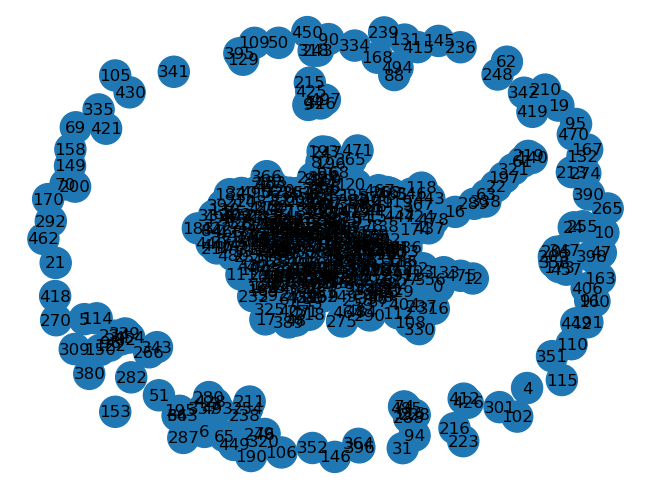

In [323]:
SEED = 0               # decides which graph is generated
N = 500                 # number of the nodes in the graph
P = 2/N                # probability of a given edge being "on"
MAX_POP = 100          # maximum population in a node

G = nx.fast_gnp_random_graph(N, P, seed=SEED) # create the graph

#populations = np.random.randint(low=0, high=MAX_POP, size=N)
populations = MAX_POP * np.ones(N).astype('int')
populations_dict = dict(enumerate(populations))

nx.set_node_attributes(G, populations_dict, 'population')

nx.draw(G, node_size=5*populations, with_labels=True)

a = Agent(graph=G, start_node=0)

In [324]:
len(nx.node_connected_component(G, 0))

373

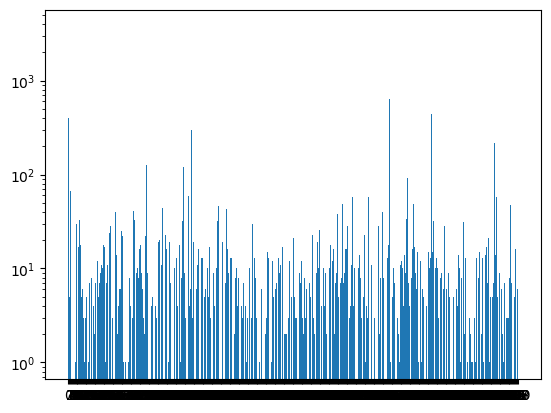

In [325]:
destinations = a.simulate(10000)
distances = np.array([])
for t in range(N):
    try:
        dist = nx.shortest_path_length(G, source=0, target=t)
    except:
        dist = -1
        
    distances = np.append(distances, dist)


ax = plt.hist(destinations, bins=np.arange(-1, N+1))
plt.yscale('log')
plt.xticks(np.arange(N))
plt.show()

Text(0, 0.5, 'number of commuters')

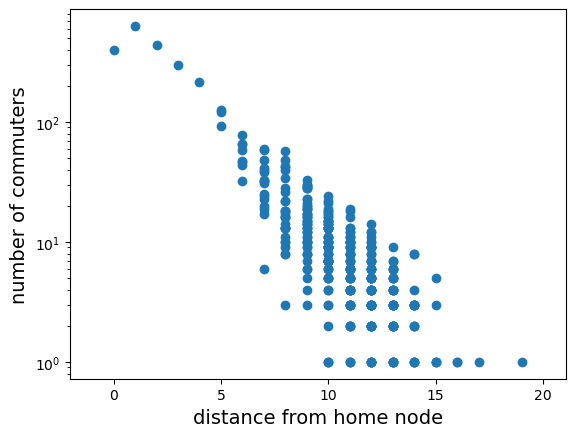

In [326]:
plt.scatter(distances, ax[0][1:])
plt.yscale('log')
plt.xlabel('distance from home node',fontsize=14)
plt.ylabel('number of commuters',fontsize=14)

In [232]:
list(G.neighbors(7))

[4, 6, 8]

In [229]:
nx.to_numpy_array(G)

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

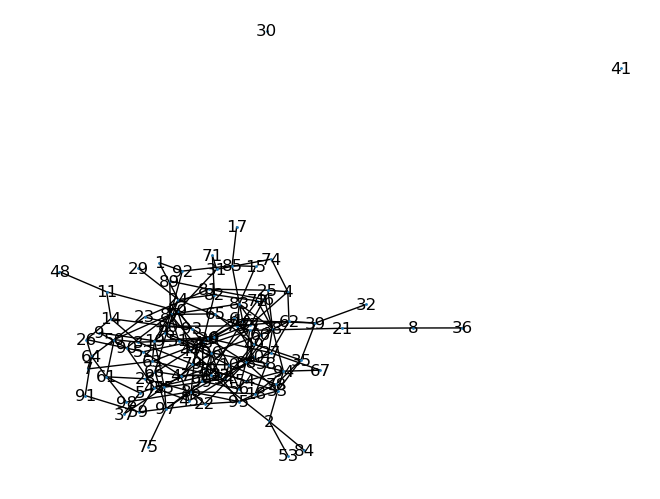

In [304]:
nx.draw(G, node_size=1, with_labels=True)
